In [59]:
####Utilized library imports####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print()
tahsilat = pd.read_excel("Tahsilat.xlsx")
print(tahsilat)
print()
print()

print(tahsilat["Portfoy"])
print()
print()


bank2p2Number = 0
bank3p2Number = 0

for i in range(0, len(tahsilat["Portfoy"])):
    portfoy_tipi = tahsilat["Portfoy"][i]
    if portfoy_tipi == "BANK2P2":
        bank2p2Number+=1
    elif portfoy_tipi == "BANK3P2":
        bank3p2Number+=1
        
        
        
print("The total number of Bank2P2 in the bank portfolios: "+str(bank2p2Number)+"")
print("The total number of Bank3P2 in the bank portfolios: "+str(bank3p2Number)+"")

bank2p2Ratio = bank2p2Number / (bank2p2Number + bank3p2Number)
bank3p2Ratio = bank3p2Number / (bank2p2Number + bank3p2Number)

print()
print()
print("BANK2P2 percentage in the bank portfolios is: "+str(bank2p2Ratio)+"")
print("BANK3P2 percentage in the bank portfolios is: "+str(bank3p2Ratio)+"")
print()
print()

tahsilat["Year"] = tahsilat["Tarih"].dt.year
filtered_data = tahsilat.loc[tahsilat["Year"] >= 2000] # Filter the data to include only rows with years greater than or equal to 2000
yearly_total = filtered_data.groupby(tahsilat["Year"])["Tahsilat"].sum() # Group the filtered data by the year extracted from "Tarih" column and calculate the sum of "Tahsilat" amounts for each year
print(yearly_total) # Print the calculated yearly total collected credit amounts.





        
        
        





              BSN  Portfoy   Tahsilat      Tarih
0      BSN0566292  BANK2P2   178.5479 2013-04-24
1      BSN0566702  BANK2P2    83.7671 2012-12-17
2      BSN0570094  BANK2P2    93.9167 2014-02-24
3      BSN0566804  BANK2P2   326.4509 2013-05-27
4      BSN0351235  BANK2P2   542.1028 2012-08-06
...           ...      ...        ...        ...
62453  BSN0543643  BANK3P2    97.8516 2013-08-12
62454  BSN0551548  BANK3P2  1850.0000 2012-06-18
62455  BSN0545609  BANK3P2   200.0000 2013-07-29
62456  BSN0549038  BANK3P2   145.0000 2013-02-13
62457  BSN0323090  BANK3P2    35.1915 2012-12-10

[62458 rows x 4 columns]


0        BANK2P2
1        BANK2P2
2        BANK2P2
3        BANK2P2
4        BANK2P2
          ...   
62453    BANK3P2
62454    BANK3P2
62455    BANK3P2
62456    BANK3P2
62457    BANK3P2
Name: Portfoy, Length: 62458, dtype: object


The total number of Bank2P2 in the bank portfolios: 41696
The total number of Bank3P2 in the bank portfolios: 20762


BANK2P2 percentage in the bank p

In [42]:
portfoy = pd.read_excel("Portfoy.xlsx")
print(portfoy)
#######Tekil müşteri adedi, toplam kredi sayısı ve toplam kredi tutarı bulma#######################
print()
print()
print(portfoy["KREDI_TURU"].nunique(),portfoy["BSN"].nunique(), portfoy["ANAPARA_BAKIYE"].sum())
print()
print()
#######Tekil müşteri adedi, toplam kredi sayısı ve toplam kredi tutarı bulma#######################



############Kredi türü bazında toplam kredi adetleri, toplam ve ortalama kredi tutarları###################################
kredi_turu_bazında_veri = portfoy.groupby("KREDI_TURU").agg(
    ToplamKrediAdedi = ("KREDI_TURU", "count"),
    ToplamKrediTutarı = ("ANAPARA_BAKIYE", "sum"),
)
kredi_turu_bazında_veri["OrtalamaKrediTutarı"] = kredi_turu_bazında_veri["ToplamKrediTutarı"] / kredi_turu_bazında_veri["ToplamKrediAdedi"]
print(kredi_turu_bazında_veri)
############Kredi türü bazında toplam kredi adetleri, toplam ve ortalama kredi tutarları###################################



##########Müşteri bazında borç tahsil edilme oranı bulma############################################
merged_data = portfoy.merge(tahsilat, on = "BSN")
print(merged_data)
musteri_bazlı_veri = merged_data.groupby("BSN").agg(
   ToplamTahsilat = ("Tahsilat","sum"),
   ToplamAnapara =("ANAPARA_BAKIYE", "sum")
)
musteri_bazlı_veri["BorçTahsilOranı"] = musteri_bazlı_veri["ToplamTahsilat"] / musteri_bazlı_veri["ToplamAnapara"]
print(musteri_bazlı_veri)
##########Müşteri bazında borç tahsil edilme oranı bulma############################################

print()
print()


#######Müşteri bazında borç tahsil edilme oranlarının dağılımını bulma#####################################
print(musteri_bazlı_veri.describe())
#######Müşteri bazında borç tahsil edilme oranlarının dağılımını bulma#####################################


#################Anapara Bazlı Profilleme##############################
anapara_bazlı_profilleme_verisi = musteri_bazlı_veri.groupby("ToplamAnapara").agg(
  OrtalamaBorçTahsilatOranı = ("BorçTahsilOranı", "mean")
)
print(anapara_bazlı_profilleme_verisi)
#################Anapara Bazlı Profilleme##############################

              BSN      KREDI_TURU KREDI_ADI_ALT_KIRILIM INTIKAL_TARIHI  \
0      BSN0000699     KREDI KARTI           KREDI KARTI     2005-12-02   
1      BSN0000740     KREDI KARTI           KREDI KARTI     2007-12-17   
2      BSN0000755         EKHESAP               EKHESAP     2009-03-31   
3      BSN0000991         EKHESAP               EKHESAP     2010-03-02   
4      BSN0000991  TUKETICI-DIGER        TUKETICI-DIGER     2010-03-02   
...           ...             ...                   ...            ...   
29395  BSN0584074  TUKETICI-TASIT        TUKETICI-TASIT     2010-03-01   
29396  BSN0584075  TUKETICI-TASIT        TUKETICI-TASIT     2009-09-09   
29397  BSN0584076  TUKETICI-TASIT        TUKETICI-TASIT     2010-02-19   
29398  BSN0584077  TUKETICI-TASIT        TUKETICI-TASIT     2000-11-08   
29399  BSN0609687     KREDI KARTI           KREDI KARTI     2009-04-28   

       ANAPARA_BAKIYE DOGUM_TARIHI   YAS       DOGUM_YERI CINSIYET  \
0             5362.40   1960-01-01  59.0 

In [43]:
print(portfoy["CINSIYET"])

0          E
1          E
2          E
3          E
4          E
        ... 
29395      K
29396      E
29397      E
29398    NaN
29399      E
Name: CINSIYET, Length: 29400, dtype: object


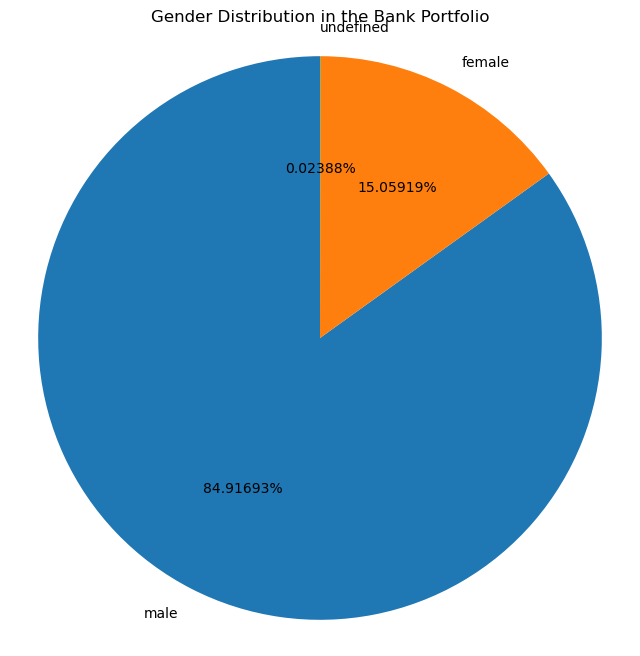

The gender distribution in the bank portfolio is as below:

There are 4414 females in the bank portfolio.
There are 24890 males in the bank portfolio.
There are 7 undefined-gendered people in the bank portfolio.
---------------------------------------------------------------------------------------------------

The percentages of females and males in the bank portfolio is as below: 

The percentage of the females in the bank portfolio is: 0.15059192794514004
The percentage of the males in the bank portfolio is: 0.8491692538637372
The percentage of the undefined-gendered people in the bank portfolio is: 0.00023881819112278667


In [44]:
maleNum = 0
femaleNum = 0
undefinedGenderNum = 0

for i in range(0, len(portfoy["CINSIYET"])):
    cinsiyet = portfoy["CINSIYET"][i]
    if cinsiyet == "E":
        maleNum+=1
    elif cinsiyet == "K":
        femaleNum+=1
    elif pd.isna(cinsiyet):
        undefinedGenderNum+=1
        
        
        
gender_data = pd.Series([maleNum, femaleNum, undefinedGenderNum], index=['male', 'female', 'undefined'])

gender_data.plot(kind='pie', autopct='%1.5f%%', startangle=90, figsize=(8, 8))
plt.axis('equal')  
plt.title("Gender Distribution in the Bank Portfolio")
plt.show()
        
print("The gender distribution in the bank portfolio is as below:")
print()
print("There are "+str(femaleNum)+" females in the bank portfolio.")
print("There are "+str(maleNum)+" males in the bank portfolio.")
print("There are "+str(undefinedGenderNum)+" undefined-gendered people in the bank portfolio.")



percentageOfMales = maleNum / (maleNum + femaleNum + undefinedGenderNum)
percentageOfFemales = femaleNum / (maleNum + femaleNum + undefinedGenderNum)
percentageOfUndefinedGenderedPeople = undefinedGenderNum / (maleNum + femaleNum + undefinedGenderNum)
      
print("---------------------------------------------------------------------------------------------------")
print()
print("The percentages of females and males in the bank portfolio is as below: ")
print()
print("The percentage of the females in the bank portfolio is: "+str(percentageOfFemales)+"")
print("The percentage of the males in the bank portfolio is: "+str(percentageOfMales)+"")
print("The percentage of the undefined-gendered people in the bank portfolio is: "+str(percentageOfUndefinedGenderedPeople)+"")


The marriage situation distribution in the bank portfolio is as below:

There are 18515 married people in the bank portfolio.
There are 9660 divorced people in the bank portfolio.
There are 7 undefined marriages in the bank portfolio.


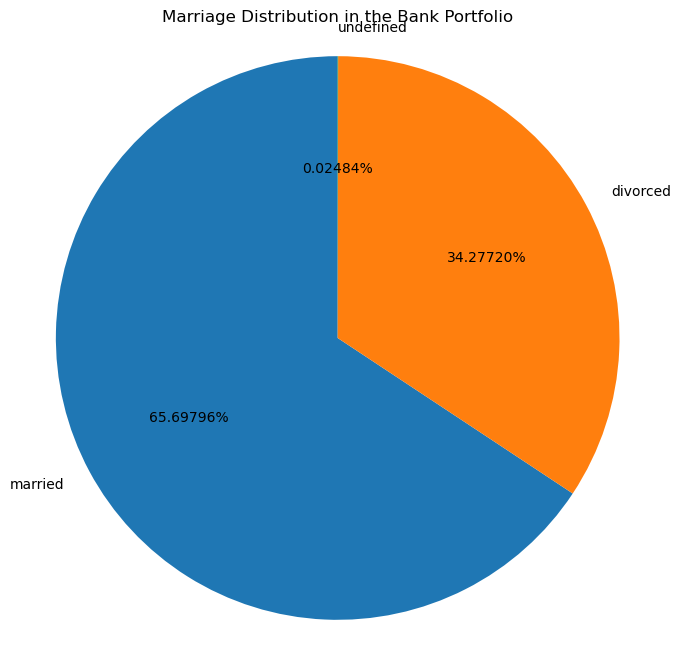

---------------------------------------------------------------------------------------------------

The percentages of the marriage statuses in the bank portfolio is as below: 

In the bank portfolio, 0.6569796323894684 percent of the people are married.
In the bank portfolio, 0.34277198211624443 percent of the people are divorced.
In the bank portfolio, 0.00024838549428713363 percent of the people have undefined marriages.


In [45]:
marriedNum = 0
divorcedNum = 0
undefinedMarriageNum = 0


for i in range(0, len(portfoy["MEDENI_HALI"])):
    medeni_hali = portfoy["MEDENI_HALI"][i]
    if medeni_hali == "E":
        marriedNum+=1
    elif medeni_hali == "B":
        divorcedNum+=1
    elif pd.isna(medeni_hali):
        undefinedMarriageNum+=1
        
        
print("The marriage situation distribution in the bank portfolio is as below:")
print()
print("There are "+str(marriedNum)+" married people in the bank portfolio.")
print("There are "+str(divorcedNum)+" divorced people in the bank portfolio.")
print("There are "+str(undefinedMarriageNum)+" undefined marriages in the bank portfolio.")

marriage_data = pd.Series([marriedNum, divorcedNum, undefinedMarriageNum], index=['married', 'divorced', 'undefined'])

marriage_data.plot(kind='pie', autopct='%1.5f%%', startangle=90, figsize=(8, 8))
plt.axis('equal')  
plt.title("Marriage Distribution in the Bank Portfolio")
plt.show()



percentageOfMarriedPeople = marriedNum / (marriedNum + divorcedNum + undefinedMarriageNum)
percentageOfDivorcedPeople = divorcedNum / (marriedNum + divorcedNum + undefinedMarriageNum)
percentageOfUndefinedMarriage = undefinedMarriageNum / (marriedNum + divorcedNum + undefinedMarriageNum)

print("---------------------------------------------------------------------------------------------------")
print()
print("The percentages of the marriage statuses in the bank portfolio is as below: ")
print()
print("In the bank portfolio, "+str(percentageOfMarriedPeople)+" percent of the people are married.")
print("In the bank portfolio, "+str(percentageOfDivorcedPeople)+" percent of the people are divorced.")
print("In the bank portfolio, "+str(percentageOfUndefinedMarriage)+" percent of the people have undefined marriages.")




           city_amount_in_portfolio
EV_IL                              
ISTANBUL                       6677
ANKARA                         2211
IZMIR                          1630
ADANA                          1595
MERSIN                         1420
...                             ...
ANTAKYA                           1
NILUFER                           1
Nigde                             1
OLTU                              1
BARCELONA                         1

[148 rows x 1 columns]




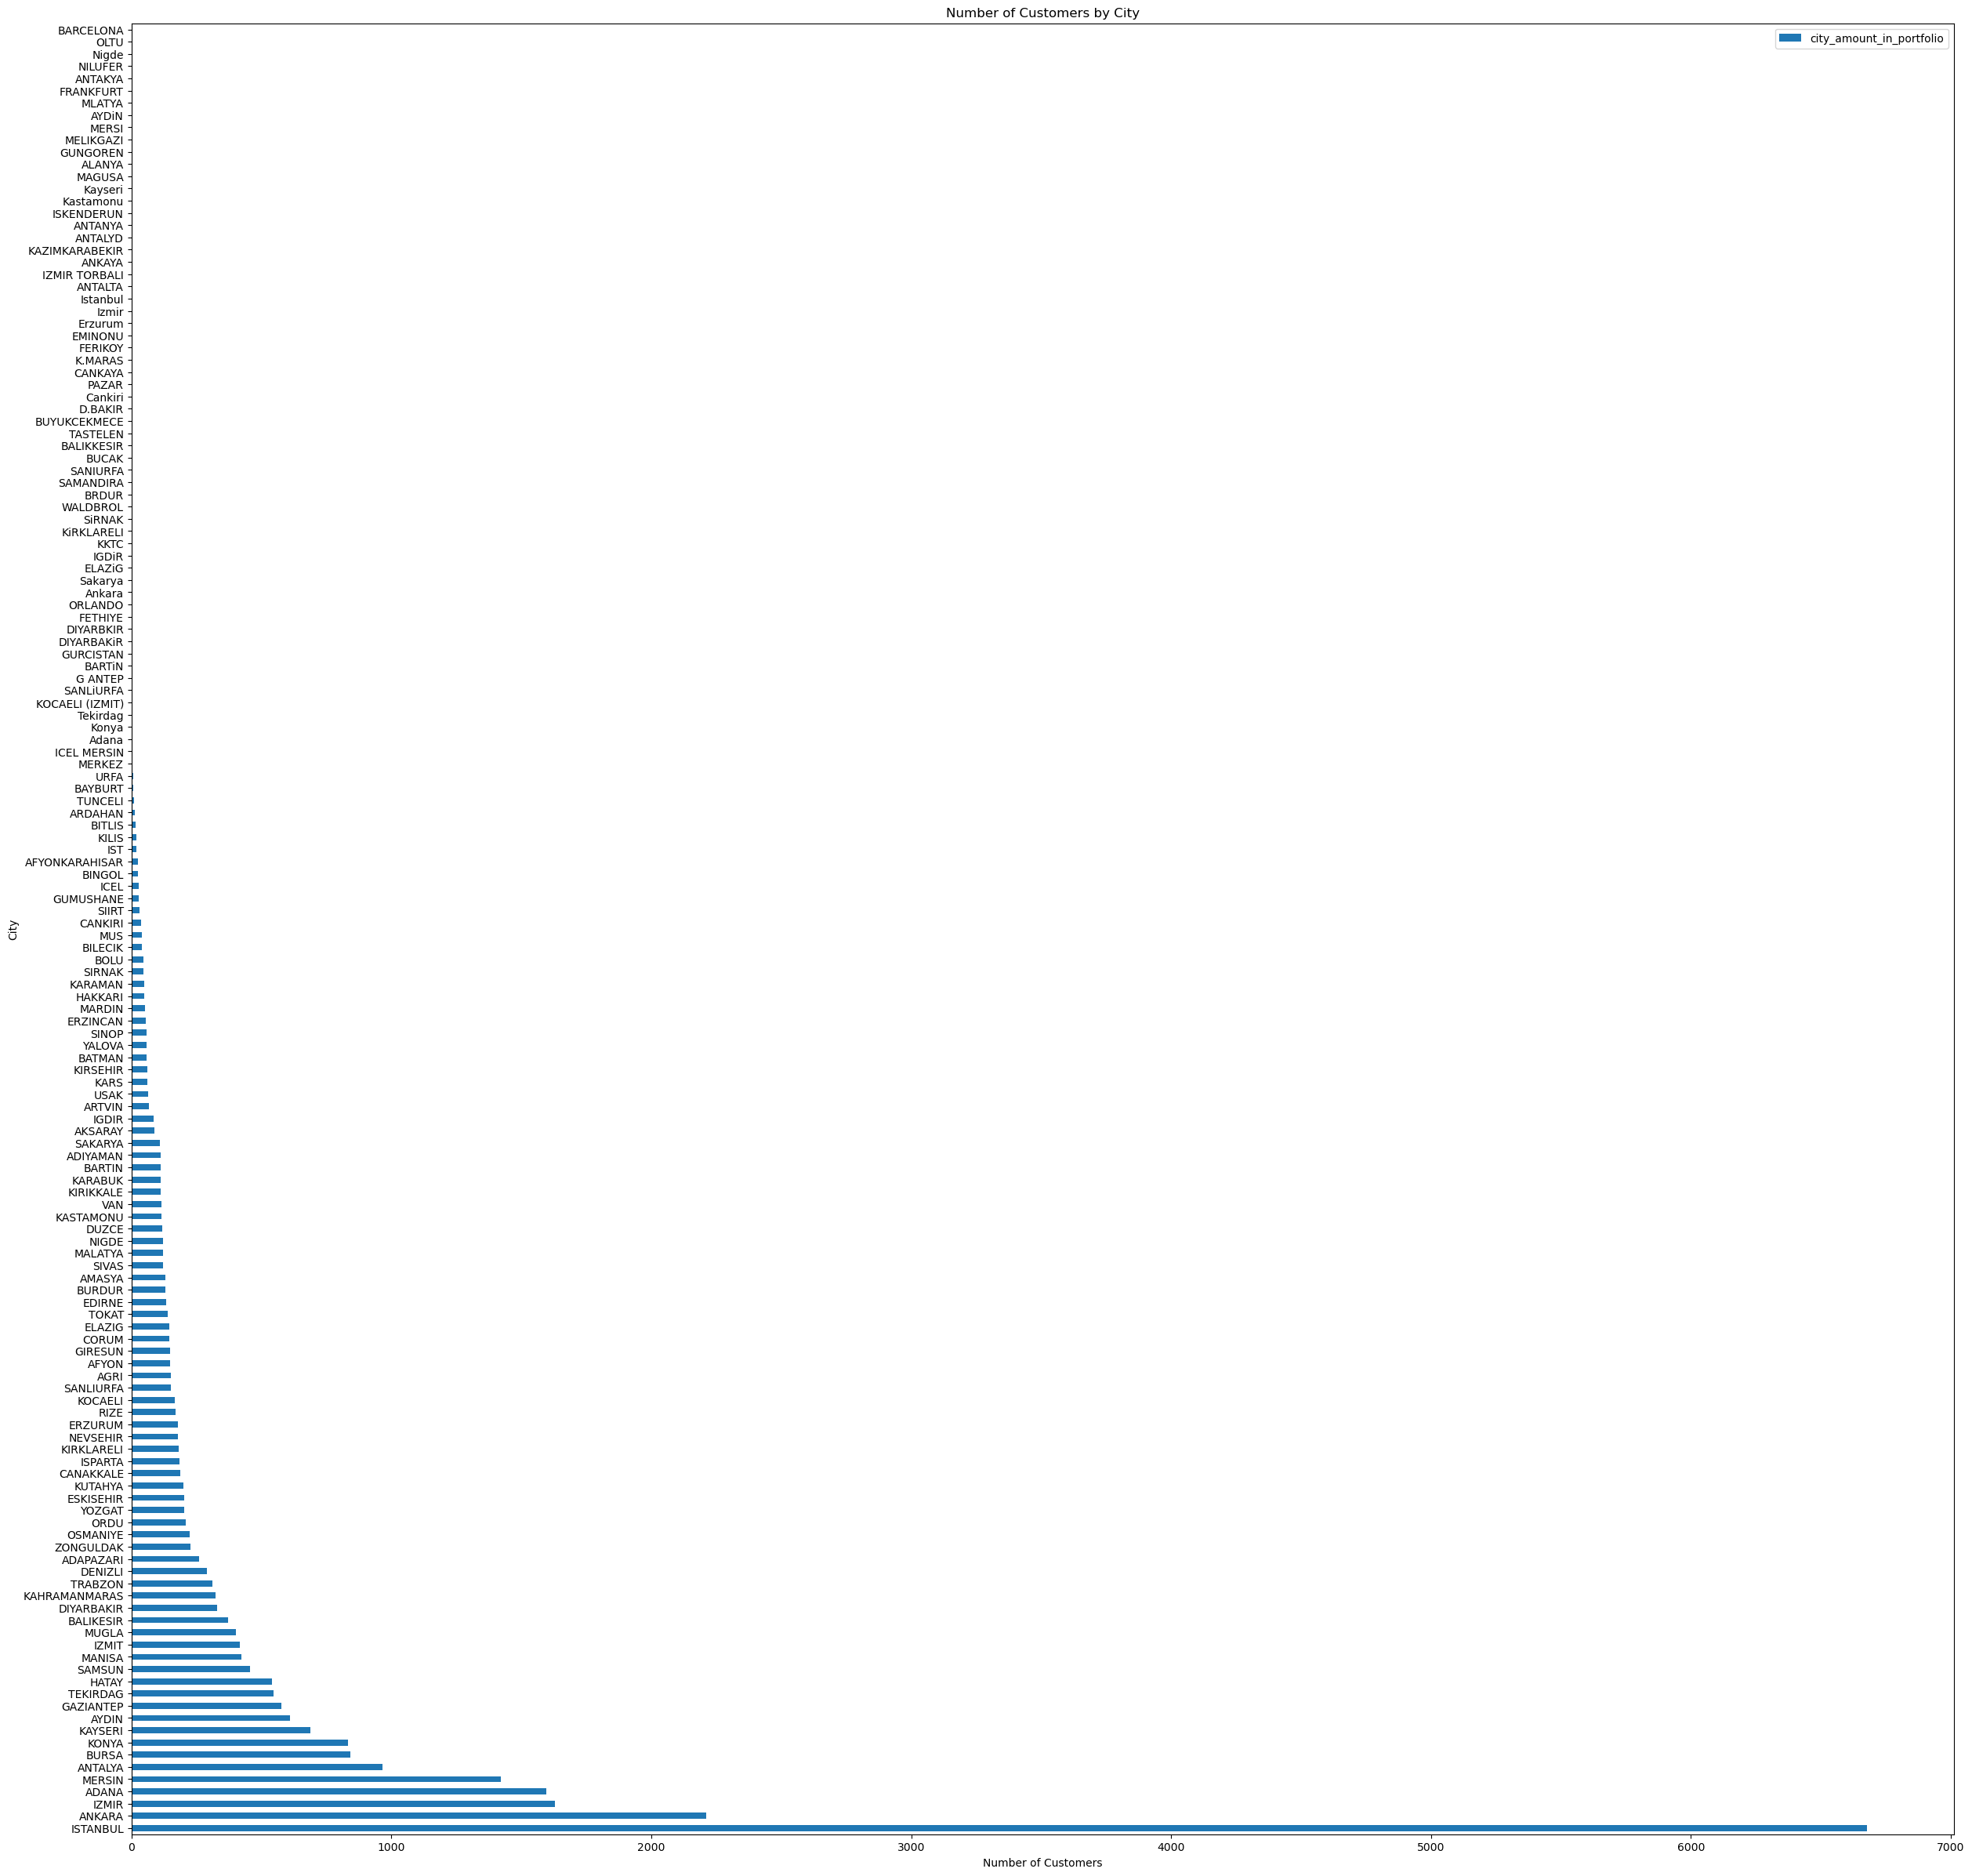

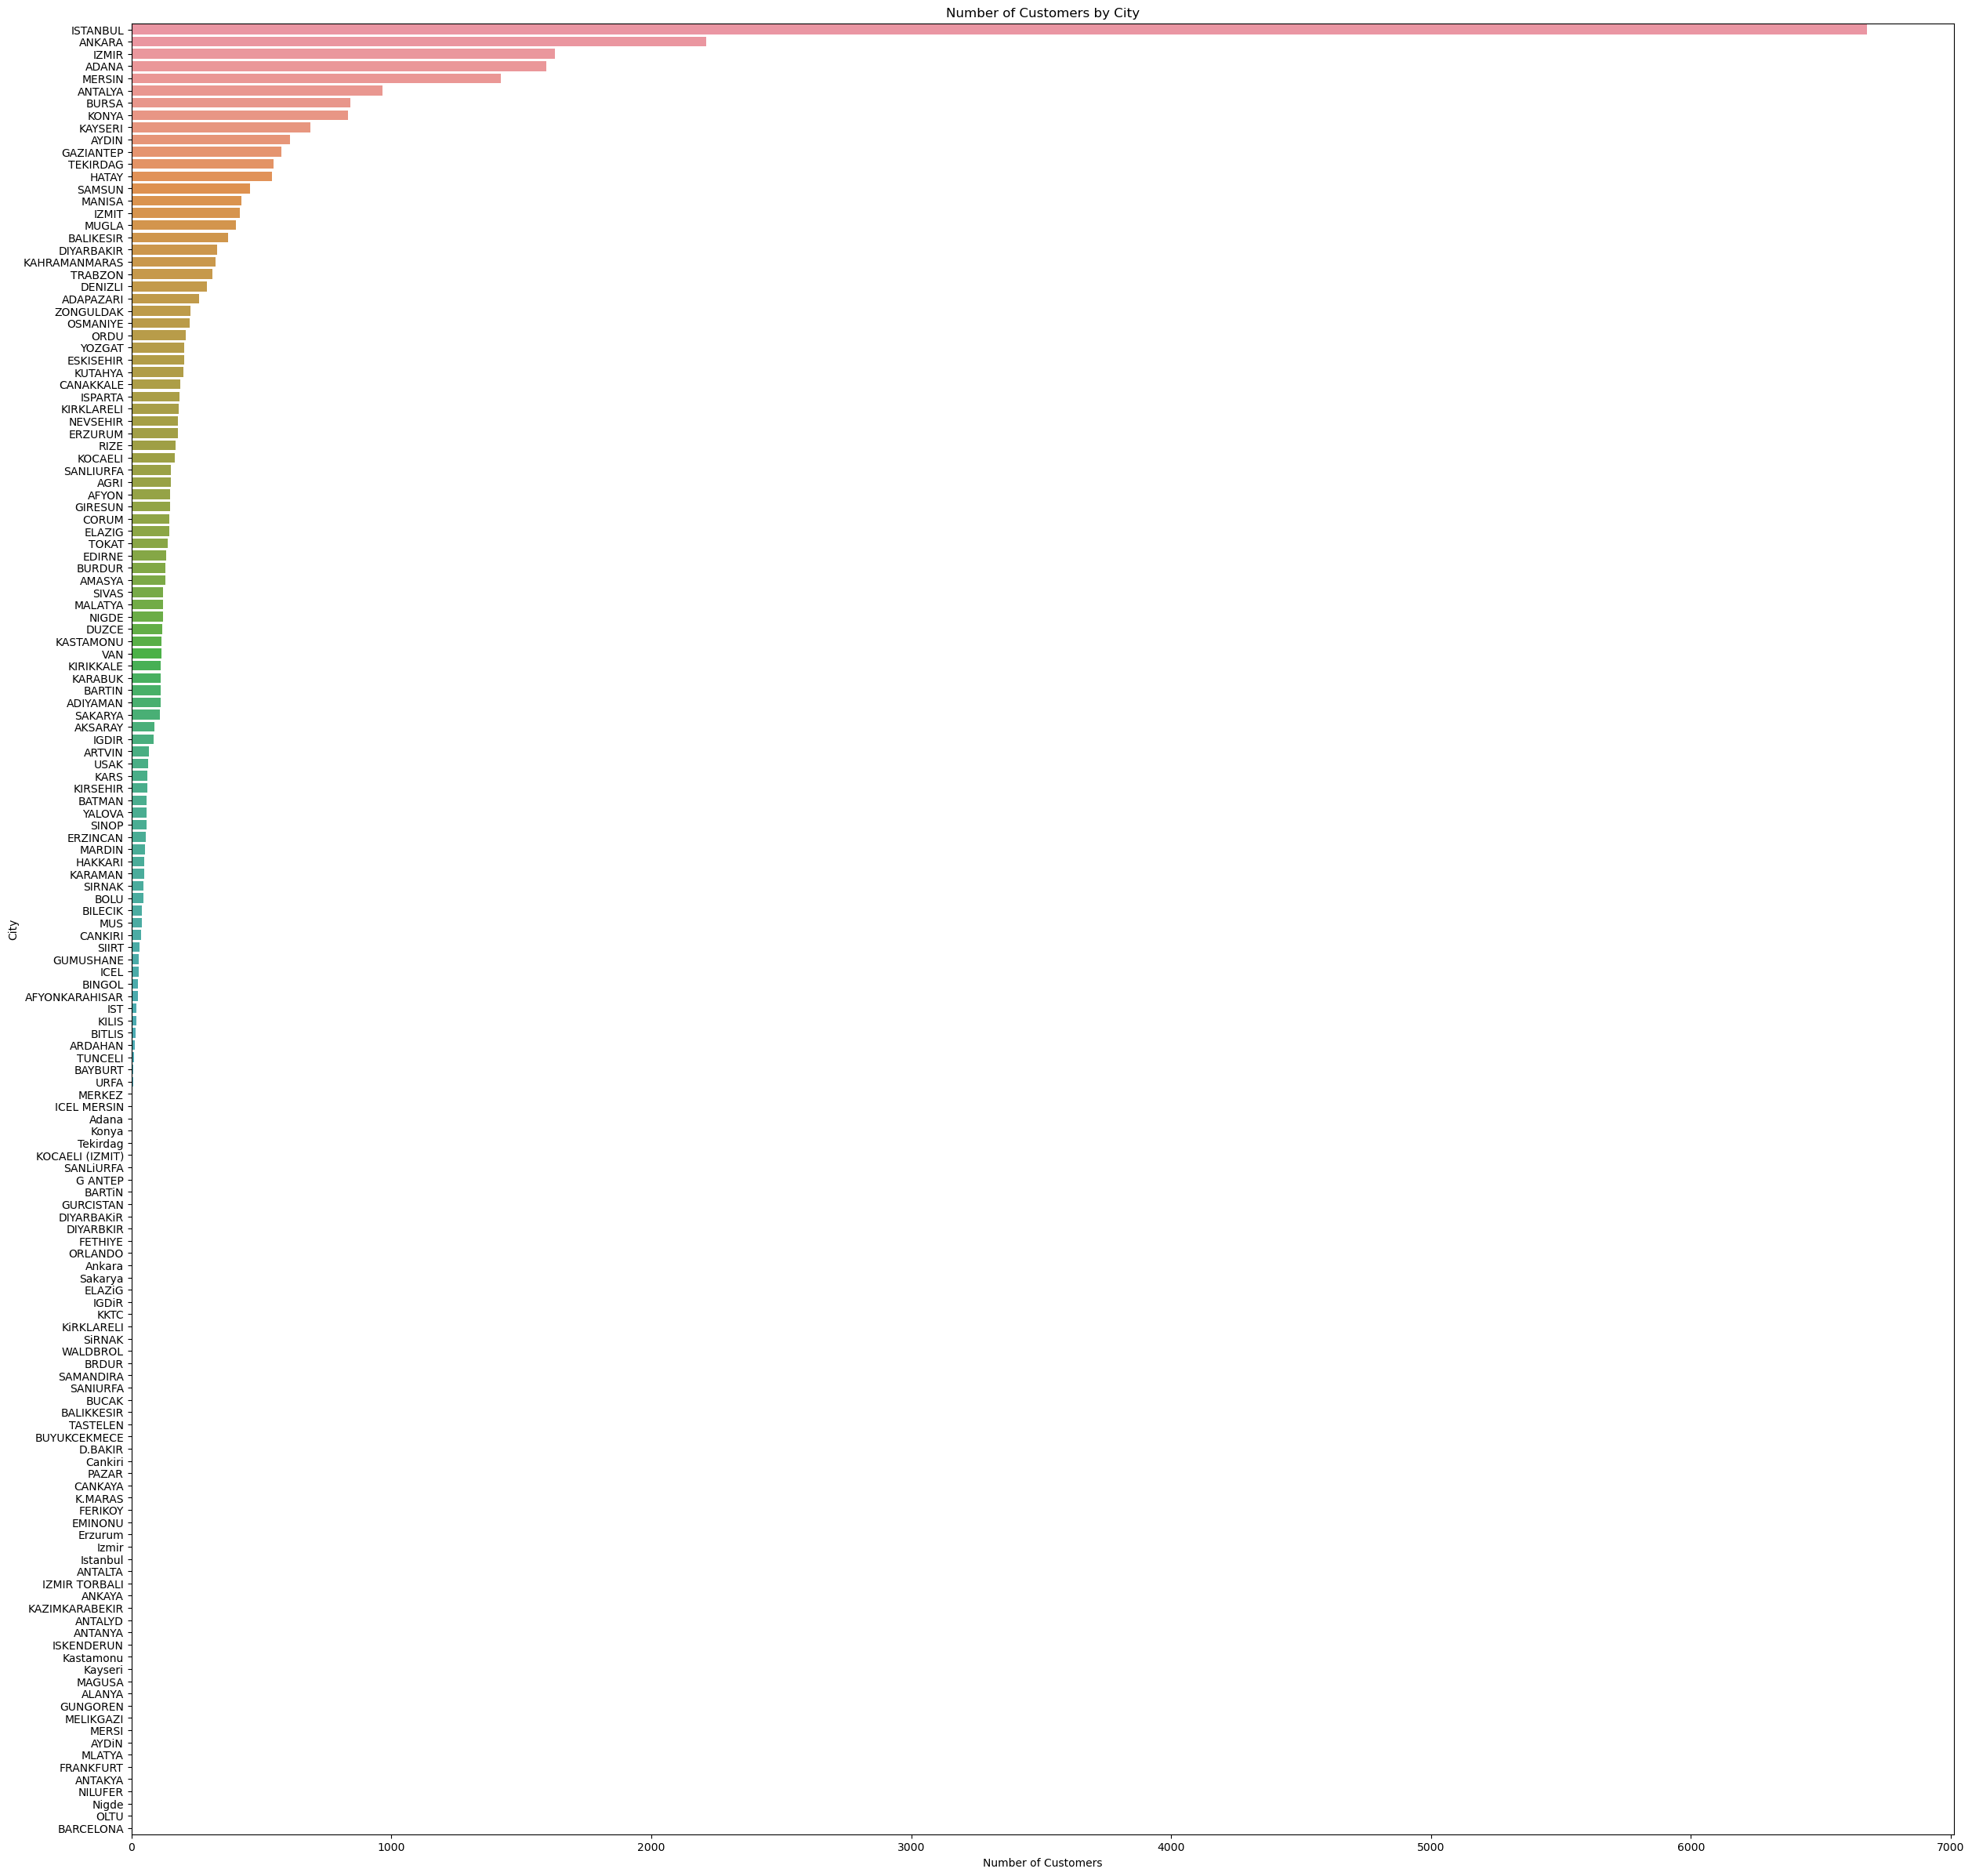

In [70]:
####################In the portfolio data, how many customers do exist from which city? Sort in a descending order.############
#####################İl bazlı profilleme############################
il_bazlı_profilleme_verisi = portfoy.groupby("EV_IL").agg(
    city_amount_in_portfolio = ("EV_IL", "count")
).sort_values(by="city_amount_in_portfolio", ascending=False)

print(il_bazlı_profilleme_verisi)
#####################İl bazlı profilleme#############################
####################In the portfolio data, how many customers do exist from which city? Sort in a descending order.############

print()
print()

##############Plotting the horizontal bar plot which shows the number of customers from each city within the portfolio data############
il_bazlı_profilleme_verisi.plot(kind="barh", figsize=(30, 30))
plt.title("Number of Customers by City")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()
##############Plotting the horizontal bar plot which shows the number of customers from each city within the portfolio data############
    
print()
print()

##############Plotting the countplot which shows the number of customers from each city within the portfolio data############
import seaborn as sns

plt.figure(figsize=(30, 30))
sns.countplot(data=portfoy, y="EV_IL", order=il_bazlı_profilleme_verisi.index)
plt.title("Number of Customers by City")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()
#############Plotting the bar chart which shows the number of customers from each city within the portfolio data#############






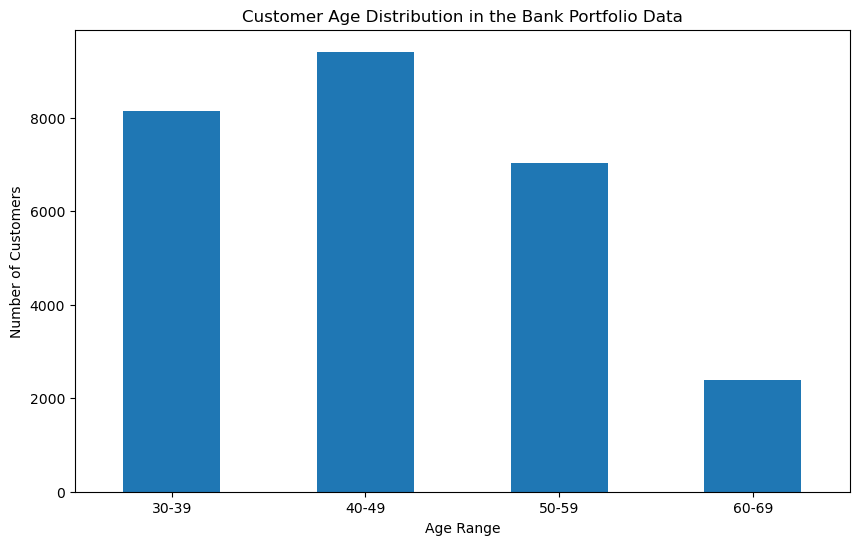

In [73]:
##########################creating 4 age ranges specified as below##################################
age_ranges = pd.cut(portfoy['YAS'], bins=[30, 40, 50, 60, 70], labels=['30-39', '40-49', '50-59', '60-69'])
age_distribution = age_ranges.value_counts().sort_index() ######Sort the age range, customer number tuple by the age range.


##############Plot the bar chart of the customer age distribution.########
age_distribution.plot(kind='bar', figsize=(10, 6))
plt.title("Customer Age Distribution in the Bank Portfolio Data")
plt.xlabel("Age Range")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()
##############Plot the bar chart of the customer age distribution.########


In [81]:
#######################In the bank portfolio data, how many of the customers are born in which city/place/district?###################
print()
birth_place_based_profiling_data = portfoy.groupby("DOGUM_YERI").agg(
    birth_count=("DOGUM_YERI", "count")
).sort_values(by="birth_count", ascending=False)

print(birth_place_based_profiling_data)
#######################In the bank portfolio data, how many of the customers are born in which city/place/district?###################


                 birth_count
DOGUM_YERI                  
ISTANBUL                1337
ANKARA                   806
ADANA                    701
IZMIR                    426
MERSIN                   367
...                      ...
HAMZALI                    1
HAMBURG/ALMANYA            1
HAMBURG ALMANYA            1
HALMSTADT ALMAN            1
ZONGULDAK.                 1

[2608 rows x 1 columns]
